In [18]:
from google.colab import drive
drive.mount('/content/Healthcare_dataset (2).xlsx')

ValueError: Mountpoint must not contain a space.

In [17]:
df = pd.read_excel('/content/Healthcare_dataset (2).xlsx')

NameError: name 'pd' is not defined

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [20]:
df = pd.read_excel('/content/Healthcare_dataset (2).xlsx')

In [ ]:
%cd /content/
pd.set_option('display.max_columns', None)
df = pd.read_excel("/content/Healthcare_dataset (2).xlsx", sheet_name = "Dataset")
df.head()

In [22]:
df.drop(columns = ['Ptid'],inplace= True)
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [ ]:
df.info()

In [24]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [ ]:
# check NAN values
pd.options.display.max_rows = 4000
df.isna().sum()

In [ ]:
# Unique per columns in the data set
print(df.apply(lambda col: col.unique()))

In [27]:
# Encode the categorical columns
# creating 2 seperate data frames to encode the categorical columns
dummy1 = pd.DataFrame()
dummy2 = pd.DataFrame()
dummy1 = df.select_dtypes(include=['object']).copy()
dummy1.drop(["Persistency_Flag"],axis=1,inplace=True) #drop Persistency_Flag, does not need encoding
dummy2 = df.select_dtypes(include=['int64']).copy()

In [ ]:
df_dummy1 = pd.DataFrame()
df_dummy1 = pd.get_dummies(dummy1,drop_first=False,prefix_sep=" ")
df_dummy1

In [29]:
df_dummy=pd.concat([df_dummy1,dummy2])
df_dummy["Persistency_Flag"] = df["Persistency_Flag"]
df_dummy.head()

,Gender Female,Gender Male,Race African American,Race Asian,Race Caucasian,Race Other/Unknown,Ethnicity Hispanic,Ethnicity Not Hispanic,Ethnicity Unknown,Region Midwest,Region Northeast,Region Other/Unknown,Region South,Region West,Age_Bucket 55-65,Age_Bucket 65-75,Age_Bucket <55,Age_Bucket >75,Ntm_Speciality CARDIOLOGY,Ntm_Speciality CLINICAL NURSE SPECIALIST,Ntm_Speciality EMERGENCY MEDICINE,Ntm_Speciality ENDOCRINOLOGY,Ntm_Speciality GASTROENTEROLOGY,Ntm_Speciality GENERAL PRACTITIONER,Ntm_Speciality GERIATRIC MEDICINE,Ntm_Speciality HEMATOLOGY & ONCOLOGY,Ntm_Speciality HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality HOSPITAL MEDICINE,Ntm_Speciality NEPHROLOGY,Ntm_Speciality NEUROLOGY,Ntm_Speciality NUCLEAR MEDICINE,Ntm_Speciality OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality OBSTETRICS AND GYNECOLOGY,Ntm_Speciality OCCUPATIONAL MEDICINE,Ntm_Speciality ONCOLOGY,Ntm_Speciality OPHTHALMOLOGY,Ntm_Speciality ORTHOPEDIC SURGERY,Ntm_Speciality ORTHOPEDICS,Ntm_Speciality OTOLARYNGOLOGY,Ntm_Speciality PAIN MEDICINE,Ntm_Speciality PATHOLOGY,Ntm_Speciality PEDIATRICS,Ntm_Speciality PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality PLASTIC SURGERY,Ntm_Speciality PODIATRY,Ntm_Speciality PSYCHIATRY AND NEUROLOGY,Ntm_Speciality PULMONARY MEDICINE,Ntm_Speciality RADIOLOGY,Ntm_Speciality RHEUMATOLOGY,Ntm_Speciality SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality TRANSPLANT SURGERY,Ntm_Speciality UROLOGY,Ntm_Speciality Unknown,Ntm_Speciality VASCULAR SURGERY,Ntm_Specialist_Flag Others,Ntm_Specialist_Flag Specialist,Ntm_Speciality_Bucket Endo/Onc/Uro,Ntm_Speciality_Bucket OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket Rheum,Gluco_Record_Prior_Ntm N,Gluco_Record_Prior_Ntm Y,Gluco_Record_During_Rx N,Gluco_Record_During_Rx Y,Dexa_During_Rx N,Dexa_During_Rx Y,Frag_Frac_Prior_Ntm N,Frag_Frac_Prior_Ntm Y,Frag_Frac_During_Rx N,Frag_Frac_During_Rx Y,Risk_Segment_Prior_Ntm HR_VHR,Risk_Segment_Prior_Ntm VLR_LR,Tscore_Bucket_Prior_Ntm <=-2.5,Tscore_Bucket_Prior_Ntm >-2.5,Risk_Segment_During_Rx HR_VHR,Risk_Segment_During_Rx Unknown,Risk_Segment_During_Rx VLR_LR,Tscore_Bucket_During_Rx <=-2.5,Tscore_Bucket_During_Rx >-2.5,Tscore_Bucket_During_Rx Unknown,Change_T_Score Improved,Change_T_Score No change,Change_T_Score Unknown,Change_T_Score Worsened,Change_Risk_Segment Improved,Change_Risk_Segment No change,Change_Risk_Segment Unknown,Change_Risk_Segment Worsened,Adherent_Flag Adherent,Adherent_Flag Non-Adherent,Idn_Indicator N,Idn_Indicator Y,Injectable_Experience_During_Rx N,Injectable_Experience_During_Rx Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms N,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms Y,Comorb_Encounter_For_Immunization N,Comorb_Encounter_For_Immunization Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx N","Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx Y",Comorb_Vitamin_D_Deficiency N,Comorb_Vitamin_D_Deficiency Y,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx N,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx Y,Comorb_Long_Term_Current_Drug_Therapy N,Comorb_Long_Term_Current_Drug_Therapy Y,Comorb_Dorsalgia N,Comorb_Dorsalgia Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions N,Comorb_Personal_History_Of_Other_Diseases_And_Conditions Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure N,Comorb_Other_Disorders_Of_Bone_Density_And_Structure Y,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias Y,Comorb_Osteoporosis_without_current_pathological_fracture N,Comorb_Osteoporosis_without_current_pathological_fracture Y,Comorb_Personal_history_of_malignant_neoplasm N,Comorb_Personal_history_of_malignant_neoplasm Y,Comorb_Gastro_esophageal_reflux_disease N,Comorb_Gastro_esophageal_reflux_disease Y,Concom_Cholesterol_And_Triglycer

([<matplotlib.patches.Wedge at 0x7954dca9a9d0>,
 [Text(1.0826199342373442, 0.1947667271171564, 'Male'),
  Text(-1.1810399183123503, -0.21247284850718462, 'Female')],
 [Text(0.49209997010788364, 0.08853033050779835, '5.7%'),
  Text(-0.5905199591561752, -0.10623642425359231, '94.3%')])

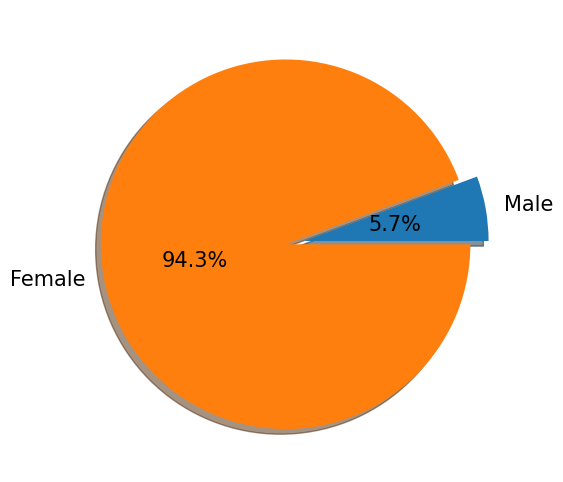

In [30]:
# checking the gender counts of the patients
plt.rcParams['font.size'] =15
figure(figsize=(6, 6))
labels = df['Gender'].unique()
data=df['Gender'].value_counts(ascending=True)
explode = (0, 0.1)
plt.pie(x=data, autopct="%.1f%%", labels=labels,explode=explode, pctdistance=0.5,shadow=True)

Persistency_Flag
Non-Persistent    2135
Persistent        1289
Name: count, dtype: int64


/tmp/ipython-input-31-1797570019.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




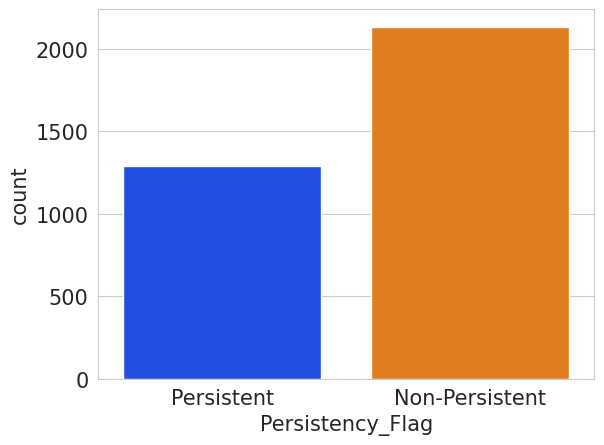

In [31]:
# checking the Persistency status counts of the patients
sns.set_style("whitegrid")
persistency_count=df.Persistency_Flag.value_counts()
sns.countplot(x="Persistency_Flag",data = df,palette="bright")
print(persistency_count)

/tmp/ipython-input-32-3326606396.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64


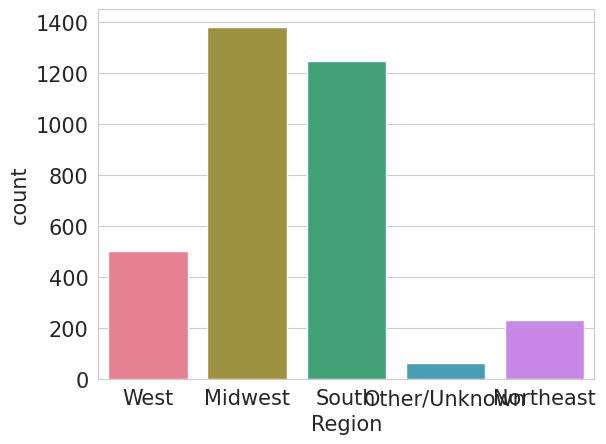

In [32]:
# checking the region of the patients
region_count= df.Region.value_counts()
sns.countplot(x="Region",data=df,palette="husl")
print (region_count)

([<matplotlib.patches.Wedge at 0x7954dd95c990>,
 [Text(-1.0835020449416526, 0.18979809958810745, 'Not Hispanic'),
  Text(1.1606169052142803, -0.30490719789933857, 'Hispanic'),
  Text(1.1958196294511787, -0.10007703942086771, 'Unknown')],
 [Text(-1.8715035321719453, 0.327833081106731, '94.5%'),
  Text(1.934361508690467, -0.5081786631655643, '2.9%'),
  Text(1.9930327157519643, -0.16679506570144617, '2.7%')])

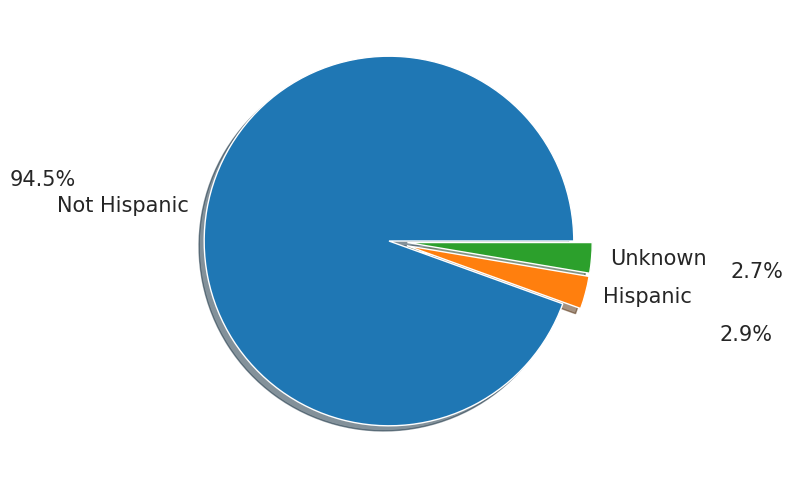

In [33]:
# checking the Ethnicity of the patients
plt.rcParams['font.size'] =15
figure(figsize=(6, 6))
labels = df['Ethnicity'].unique()
data=df['Ethnicity'].value_counts(ascending=False)
explode = (0, 0.1, 0.1)
plt.pie(x=data, autopct="%.1f%%",explode=explode, labels=labels, pctdistance=1.9, shadow=True)

Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64


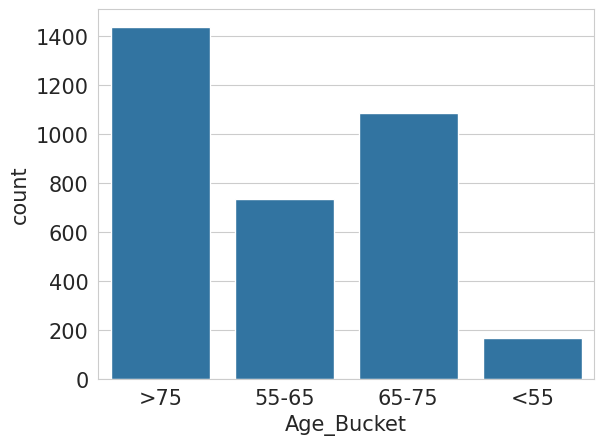

In [34]:
# checking the Age range of the patients in the study
age_count=df.Age_Bucket.value_counts()
sns.countplot(x="Age_Bucket",data=df)
print (age_count)

<Axes: xlabel='Age_Bucket', ylabel='count'>

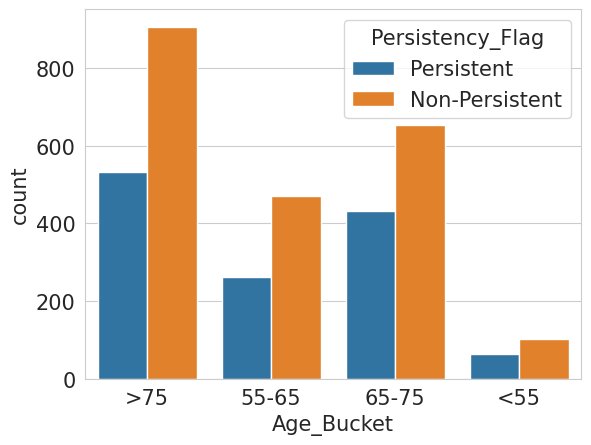

In [35]:
# checking the Age range of the patients per Persistency status
sns.countplot(x="Age_Bucket", hue="Persistency_Flag", data=df)

<Axes: xlabel='Gender', ylabel='count'>

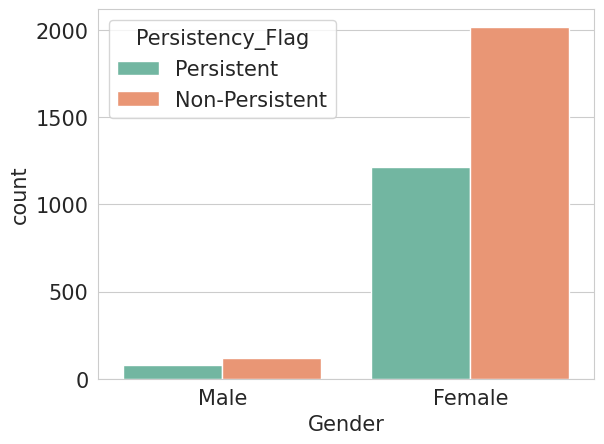

In [36]:
# checking the gender of the patients per Persistency status
sns.countplot(x="Gender", hue="Persistency_Flag", data=df, palette="Set2")

<Axes: xlabel='Ethnicity', ylabel='count'>

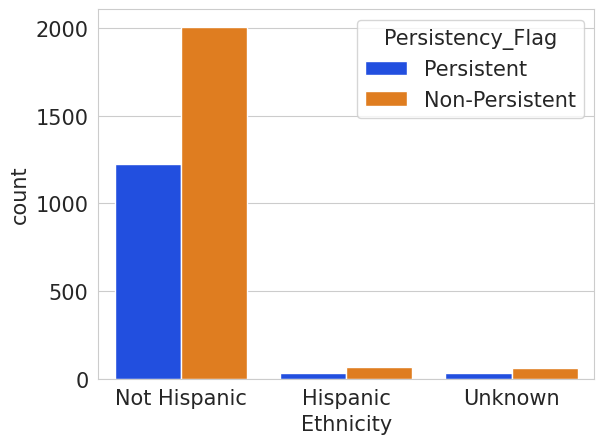

In [37]:
# checking the Ethnicity of the patients per Persistency status
sns.countplot(x="Ethnicity", hue="Persistency_Flag", data=df, palette="bright")

<Axes: xlabel='Region', ylabel='count'>

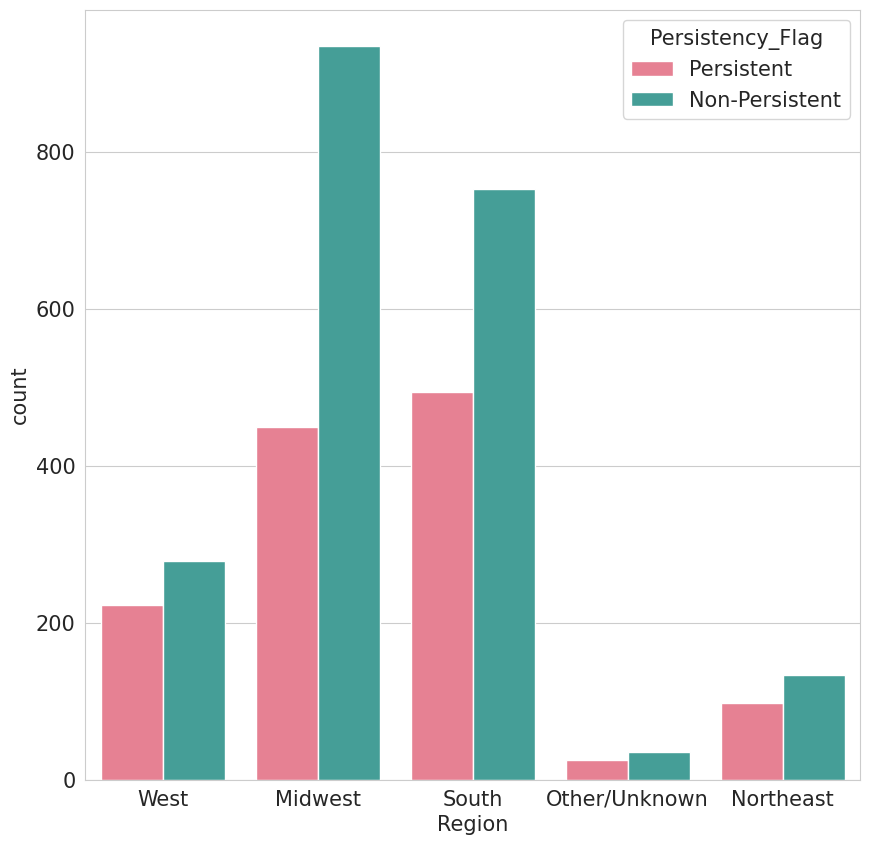

In [38]:
# checking the Region of the patients per Persistency status
figure(figsize=(10, 10))
sns.countplot(x="Region", hue="Persistency_Flag", data=df, palette="husl")

<Axes: xlabel='Count_Of_Risks', ylabel='count'>

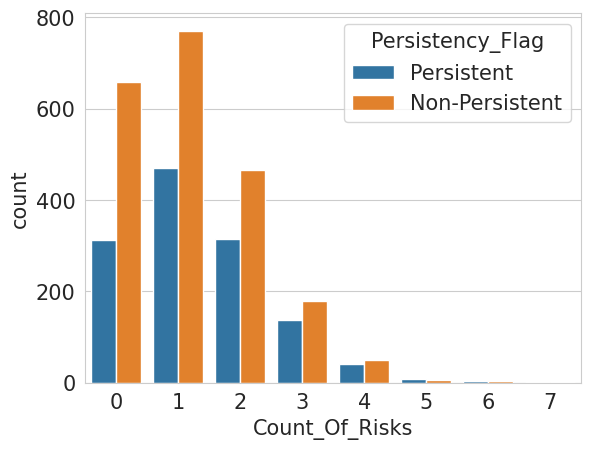

In [39]:
# checking the Region of the patients per Persistency status
sns.countplot(x="Count_Of_Risks", hue="Persistency_Flag", data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: xlabel='Age_Bucket', ylabel='Count_Of_Risks'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



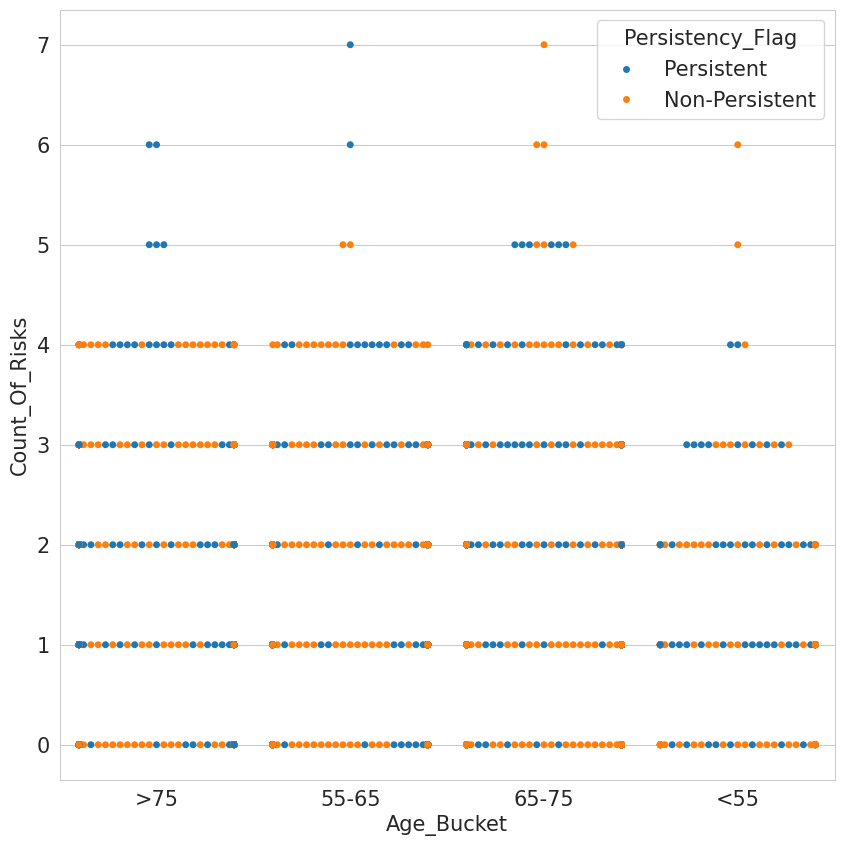

In [40]:
# checking the distribution of patients based on age and count of risk
figure(figsize=(10, 10))
sns.swarmplot(x=df["Age_Bucket"], y=df["Count_Of_Risks"], hue=df["Persistency_Flag"])

In [42]:
# Select only numeric columns
df_numeric = df_dummy.select_dtypes(include='number')

# Now compute correlation
corr = df_numeric.corr()

# Apply your threshold
corr_threshold = (corr > 0.0001) & (corr != 1)


In [ ]:
df_corr = pd.DataFrame(data=corr)
df_corr.head(30)

In [46]:
%cd /content/
df_dummy_DA = pd.read_excel('/content/Healthcare_dataset (2).xlsx',sheet_name= 'Dataset')

/content


In [ ]:
df_dummy_DA

In [48]:
pip install numpy==1.23.5


In [ ]:
from dominance_analysis import Dominance
dominance_regression = Dominance(data=df_dummy_DA,target='Persistency_Flag', objective= 1)

In [52]:
# Check for non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['Ptid_P10', 'Ptid_P100', 'Ptid_P1000', 'Ptid_P1001', 'Ptid_P1002',
       'Ptid_P1003', 'Ptid_P1004', 'Ptid_P1005', 'Ptid_P1006', 'Ptid_P1007',
       ...
       'Risk_Family_History_Of_Osteoporosis_Y', 'Risk_Low_Calcium_Intake_Y',
       'Risk_Vitamin_D_Insufficiency_Y', 'Risk_Poor_Health_Frailty_Y',
       'Risk_Excessive_Thinness_Y', 'Risk_Hysterectomy_Oophorectomy_Y',
       'Risk_Estrogen_Deficiency_Y', 'Risk_Immobilization_Y',
       'Risk_Recurring_Falls_Y', 'Persistency_Flag'],
      dtype='object', length=3538)


In [53]:
df_encoded_clean = df_encoded.apply(pd.to_numeric, errors='coerce')


In [54]:
df_encoded_clean = df_encoded_clean.dropna()


In [57]:
# Convert to numeric, but keep the DataFrame with NaNs
df_temp = df_encoded.apply(pd.to_numeric, errors='coerce')

# Drop columns with more than, say, 50% NaN values
threshold = len(df_temp) * 0.5
df_temp = df_temp.dropna(axis=1, thresh=threshold)

# Now drop rows with NaN
df_encoded_clean = df_temp.dropna()

print("Cleaned shape:", df_encoded_clean.shape)


Cleaned shape: (3424, 3539)


In [ ]:
print(df_encoded.dtypes)               # Check for non-numeric types
print(df_encoded.isnull().sum())       # Check for missing values
print(df_encoded.head())               # Preview your data


In [71]:
print(df_encoded_clean.columns.tolist())


['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'Ptid_P10', 'Ptid_P100', 'Ptid_P1000', 'Ptid_P1001', 'Ptid_P1002', 'Ptid_P1003', 'Ptid_P1004', 'Ptid_P1005', 'Ptid_P1006', 'Ptid_P1007', 'Ptid_P1008', 'Ptid_P1009', 'Ptid_P101', 'Ptid_P1010', 'Ptid_P1011', 'Ptid_P1012', 'Ptid_P1013', 'Ptid_P1014', 'Ptid_P1015', 'Ptid_P1016', 'Ptid_P1017', 'Ptid_P1018', 'Ptid_P1019', 'Ptid_P102', 'Ptid_P1020', 'Ptid_P1021', 'Ptid_P1022', 'Ptid_P1023', 'Ptid_P1024', 'Ptid_P1025', 'Ptid_P1026', 'Ptid_P1027', 'Ptid_P1028', 'Ptid_P1029', 'Ptid_P103', 'Ptid_P1030', 'Ptid_P1031', 'Ptid_P1032', 'Ptid_P1033', 'Ptid_P1034', 'Ptid_P1035', 'Ptid_P1036', 'Ptid_P1037', 'Ptid_P1038', 'Ptid_P1039', 'Ptid_P104', 'Ptid_P1040', 'Ptid_P1041', 'Ptid_P1042', 'Ptid_P1043', 'Ptid_P1044', 'Ptid_P1045', 'Ptid_P1046', 'Ptid_P1047', 'Ptid_P1048', 'Ptid_P1049', 'Ptid_P105', 'Ptid_P1050', 'Ptid_P1051', 'Ptid_P1052', 'Ptid_P1053', 'Ptid_P1054', 'Ptid_P1055', 'Ptid_P1056', 'Ptid_P1057', 'Ptid_P1058', 'Ptid_P1059', 'Ptid_P106', 'Ptid_P1060', '

In [72]:
missing_cols = [col for col in final_columns if col not in df_encoded_clean.columns]
print("Missing columns:", missing_cols)


Missing columns: ['CARDIOLOGY', 'ENDOCRINOLOGY', 'GENERAL PRACTITIONER', 'ONCOLOGY', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco', 'Risk_Vitamin_D_Insufficiency', 'Persistency_Flag']


In [73]:
selected_predictors = [
    'Speciality_CARDIOLOGY', 'Speciality_ENDOCRINOLOGY', 'Speciality_GENERAL PRACTITIONER', 'Speciality_ONCOLOGY',
    'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types',
    'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines',
    'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco',
    'Risk_Vitamin_D_Insufficiency', 'Count_Of_Risks'
]


In [78]:
print(df_encoded.columns.tolist())


['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'Ptid_P10', 'Ptid_P100', 'Ptid_P1000', 'Ptid_P1001', 'Ptid_P1002', 'Ptid_P1003', 'Ptid_P1004', 'Ptid_P1005', 'Ptid_P1006', 'Ptid_P1007', 'Ptid_P1008', 'Ptid_P1009', 'Ptid_P101', 'Ptid_P1010', 'Ptid_P1011', 'Ptid_P1012', 'Ptid_P1013', 'Ptid_P1014', 'Ptid_P1015', 'Ptid_P1016', 'Ptid_P1017', 'Ptid_P1018', 'Ptid_P1019', 'Ptid_P102', 'Ptid_P1020', 'Ptid_P1021', 'Ptid_P1022', 'Ptid_P1023', 'Ptid_P1024', 'Ptid_P1025', 'Ptid_P1026', 'Ptid_P1027', 'Ptid_P1028', 'Ptid_P1029', 'Ptid_P103', 'Ptid_P1030', 'Ptid_P1031', 'Ptid_P1032', 'Ptid_P1033', 'Ptid_P1034', 'Ptid_P1035', 'Ptid_P1036', 'Ptid_P1037', 'Ptid_P1038', 'Ptid_P1039', 'Ptid_P104', 'Ptid_P1040', 'Ptid_P1041', 'Ptid_P1042', 'Ptid_P1043', 'Ptid_P1044', 'Ptid_P1045', 'Ptid_P1046', 'Ptid_P1047', 'Ptid_P1048', 'Ptid_P1049', 'Ptid_P105', 'Ptid_P1050', 'Ptid_P1051', 'Ptid_P1052', 'Ptid_P1053', 'Ptid_P1054', 'Ptid_P1055', 'Ptid_P1056', 'Ptid_P1057', 'Ptid_P1058', 'Ptid_P1059', 'Ptid_P106', 'Ptid_P1060', '

In [79]:
[col for col in df_encoded.columns if 'CARDIOLOGY' in col]


[]

In [80]:
def find_closest_cols(cols, df_cols):
    found = []
    for c in cols:
        matches = [col for col in df_cols if c.replace('_',' ').split()[0].upper() in col.upper()]
        if matches:
            found.append(matches[0])
        else:
            print(f"No match found for: {c}")
    return found

actual_cols = find_closest_cols(selected_predictors, df_encoded.columns.tolist())
print("Mapped columns to use:", actual_cols)


Mapped columns to use: ['Ntm_Speciality_CLINICAL NURSE SPECIALIST', 'Ntm_Speciality_CLINICAL NURSE SPECIALIST', 'Ntm_Speciality_CLINICAL NURSE SPECIALIST', 'Ntm_Speciality_CLINICAL NURSE SPECIALIST', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y', 'Count_Of_Risks', 'Count_Of_Risks', 'Count_Of_Risks', 'Count_Of_Risks', 'Count_Of_Risks']


In [81]:
final_columns = actual_cols + [target_variable]
df_final = df_encoded[final_columns].dropna()


In [85]:
print(df_encoded.columns.tolist())

['Dexa_Freq_During_Rx', 'Count_Of_Risks', 'Ptid_P10', 'Ptid_P100', 'Ptid_P1000', 'Ptid_P1001', 'Ptid_P1002', 'Ptid_P1003', 'Ptid_P1004', 'Ptid_P1005', 'Ptid_P1006', 'Ptid_P1007', 'Ptid_P1008', 'Ptid_P1009', 'Ptid_P101', 'Ptid_P1010', 'Ptid_P1011', 'Ptid_P1012', 'Ptid_P1013', 'Ptid_P1014', 'Ptid_P1015', 'Ptid_P1016', 'Ptid_P1017', 'Ptid_P1018', 'Ptid_P1019', 'Ptid_P102', 'Ptid_P1020', 'Ptid_P1021', 'Ptid_P1022', 'Ptid_P1023', 'Ptid_P1024', 'Ptid_P1025', 'Ptid_P1026', 'Ptid_P1027', 'Ptid_P1028', 'Ptid_P1029', 'Ptid_P103', 'Ptid_P1030', 'Ptid_P1031', 'Ptid_P1032', 'Ptid_P1033', 'Ptid_P1034', 'Ptid_P1035', 'Ptid_P1036', 'Ptid_P1037', 'Ptid_P1038', 'Ptid_P1039', 'Ptid_P104', 'Ptid_P1040', 'Ptid_P1041', 'Ptid_P1042', 'Ptid_P1043', 'Ptid_P1044', 'Ptid_P1045', 'Ptid_P1046', 'Ptid_P1047', 'Ptid_P1048', 'Ptid_P1049', 'Ptid_P105', 'Ptid_P1050', 'Ptid_P1051', 'Ptid_P1052', 'Ptid_P1053', 'Ptid_P1054', 'Ptid_P1055', 'Ptid_P1056', 'Ptid_P1057', 'Ptid_P1058', 'Ptid_P1059', 'Ptid_P106', 'Ptid_P1060', '

In [86]:
for col_name in df_encoded.columns:
    if any(key.lower() in col_name.lower() for key in [
        'cardiology', 'endocrinology', 'general practitioner', 'oncology',
        'fluoroquinolones', 'cephalosporins', 'macrolides',
        'broad_spectrum_penicillins', 'anaesthetics', 'viral_vaccines',
        'rheumatoid_arthritis', 'hypogonadism', 'smoking', 'vitamin_d']):
        print(col_name)


Ntm_Speciality_ENDOCRINOLOGY
Ntm_Speciality_GENERAL PRACTITIONER
Ntm_Speciality_HEMATOLOGY & ONCOLOGY
Ntm_Speciality_ONCOLOGY
Comorb_Vitamin_D_Deficiency_Y
Concom_Fluoroquinolones_Y
Concom_Cephalosporins_Y
Concom_Macrolides_And_Similar_Types_Y
Concom_Broad_Spectrum_Penicillins_Y
Concom_Anaesthetics_General_Y
Concom_Viral_Vaccines_Y
Risk_Rheumatoid_Arthritis_Y
Risk_Untreated_Chronic_Hypogonadism_Y
Risk_Smoking_Tobacco_Y
Risk_Vitamin_D_Insufficiency_Y


In [87]:
selected_predictors = [
    'Speciality_CARDIOLOGY',  # exact column name from df_encoded.columns
    'Speciality_ENDOCRINOLOGY',
    'Speciality_GENERAL_PRACTITIONER',  # maybe underscore instead of space
    'Speciality_ONCOLOGY',
    'Concom_Fluoroquinolones',
    'Concom_Cephalosporins',
    'Concom_Macrolides_And_Similar_Types',
    'Concom_Broad_Spectrum_Penicillins',
    'Concom_Anaesthetics_General',
    'Concom_Viral_Vaccines',
    'Risk_Rheumatoid_Arthritis',
    'Risk_Untreated_Chronic_Hypogonadism',
    'Risk_Smoking_Tobacco',
    'Risk_Vitamin_D_Insufficiency',
    'Count_Of_Risks'
]


In [ ]:
# Check columns first
print(df_dummy_DA.columns)

# Missing value imputation (mean)
df_dummy_DA['Count_Of_Risks'] = df_dummy_DA['Count_Of_Risks'].fillna(df_dummy_DA['Count_Of_Risks'].mean())

# Outlier handling by IQR for 'Count_Of_Risks'
Q1 = df_dummy_DA['Count_Of_Risks'].quantile(0.25)
Q3 = df_dummy_DA['Count_Of_Risks'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_dummy_DA['Count_Of_Risks'] = df_dummy_DA['Count_Of_Risks'].clip(lower_bound, upper_bound)


In [ ]:
print(df_dummy_DA.isnull().sum())  # Confirm no missing values remain in columns you cleaned
print(df_dummy_DA.describe())      # Check the stats to verify outliers are capped/clipped


In [95]:
# Example using one-hot encoding for categorical columns
categorical_cols = df_dummy_DA.select_dtypes(include=['object']).columns
df_dummy_DA = pd.get_dummies(df_dummy_DA, columns=categorical_cols, drop_first=True)


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df_dummy_DA.select_dtypes(include=['float64', 'int64']).columns

df_dummy_DA[numeric_cols] = scaler.fit_transform(df_dummy_DA[numeric_cols])


In [ ]:
print(df_dummy_DA.columns)


In [ ]:
import pandas as pd

# Example DataFrame
df = df_dummy_DA.copy()

# Numeric column mean imputation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)  # Or df[col].median()

# Categorical column mode imputation
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [101]:
from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)

# Select numeric columns only for KNN imputer
num_df = df.select_dtypes(include=[np.number])

# Fit and transform
num_df_imputed = pd.DataFrame(imputer.fit_transform(num_df), columns=num_df.columns)

# Replace original numeric columns with imputed ones
df[num_df.columns] = num_df_imputed


In [102]:
from scipy import stats
import numpy as np

df_num = df.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(df_num))
threshold = 3

# Get boolean mask for rows without outliers
no_outliers = (z_scores < threshold).all(axis=1)

# Filter dataframe to keep rows without outliers
df_no_outliers = df[no_outliers]


In [103]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for values inside IQR bounds
filter_iqr = ~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter dataframe
df_iqr_filtered = df[filter_iqr]
